<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/ET1_Bagging_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging Regressor (Step-by-Step)
This notebook explains Bagging Regressor with Decision Tree, SVR, and KNN.

## 1. Import Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.metrics import r2_score


## 2. Create Regression Dataset

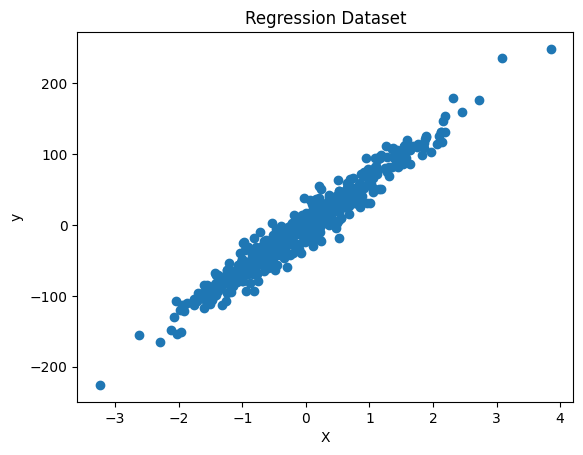

In [2]:

X, y = make_regression(
    n_samples=500,
    n_features=1,
    noise=15,
    random_state=42
)

plt.scatter(X, y)
plt.title("Regression Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


## 3. Train-Test Split

In [3]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)


## 4. Choose Base Estimator

In [4]:

# Uncomment ONE base estimator

# base_model = DecisionTreeRegressor(max_depth=5, random_state=42)
# use_scaling = False

# base_model = SVR(kernel='rbf')
# use_scaling = True

base_model = KNeighborsRegressor(n_neighbors=5)
use_scaling = True


## 5. Create Bagging Regressor

In [5]:

bagging_model = BaggingRegressor(
    estimator=base_model,
    n_estimators=50,
    max_samples=0.8,
    max_features=1.0,
    bootstrap=True,
    random_state=42
)


## 6. Handle Scaling using Pipeline

In [6]:

if use_scaling:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("bagging", bagging_model)
    ])
else:
    model = bagging_model


## 7. Train the Model

In [7]:

model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('bagging',
                 BaggingRegressor(estimator=KNeighborsRegressor(),
                                  max_samples=0.8, n_estimators=50,
                                  random_state=42))])

## 8. Evaluate Model

In [8]:

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.9150366716062899


## 9. Visualization

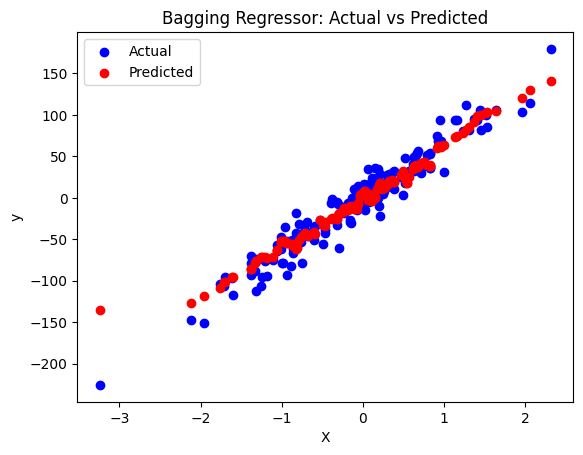

In [9]:

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title("Bagging Regressor: Actual vs Predicted")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
